# 可视化训练日志-训练过程总体评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/root/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/root/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(byte

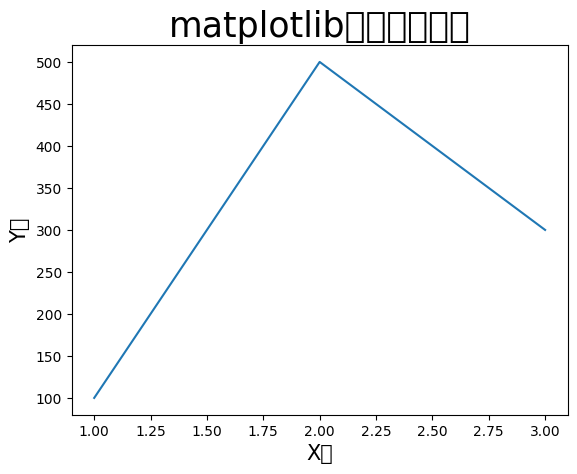

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [5]:
import os
os.chdir('mmsegmentation')

In [6]:
os.getcwd()

'/home/wqq/MMSegmentation_Tutorials-main/mmsegmentation'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [8]:
# 日志文件路径
log_path = './work_dirs/one77Dataset-Mask2Former/Mask2Former-b=2,1e-5/vis_data/scalars.json'

In [9]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [10]:
len(json_list)

240

In [11]:
eval(json_list[4])

{'base_lr': 9.971926692530234e-06,
 'lr': 9.971926692530235e-07,
 'data_time': 0.010618162155151368,
 'grad_norm': 385.93130655288695,
 'loss': 33.74611239433288,
 'decode.loss_cls': 0.4981771861203015,
 'decode.loss_mask': 1.3734208840876818,
 'decode.loss_dice': 1.1745347529649734,
 'decode.d0.loss_cls': 3.695500612258911,
 'decode.d0.loss_mask': 1.3823770843446255,
 'decode.d0.loss_dice': 1.1512647241353988,
 'decode.d1.loss_cls': 0.6113314740359783,
 'decode.d1.loss_mask': 1.379830039292574,
 'decode.d1.loss_dice': 1.130167657136917,
 'decode.d2.loss_cls': 0.5531574141234159,
 'decode.d2.loss_mask': 1.4206569381058216,
 'decode.d2.loss_dice': 1.1560433834791184,
 'decode.d3.loss_cls': 0.558260484226048,
 'decode.d3.loss_mask': 1.320841344445944,
 'decode.d3.loss_dice': 1.122801885008812,
 'decode.d4.loss_cls': 0.4834964666515589,
 'decode.d4.loss_mask': 1.4687010016292334,
 'decode.d4.loss_dice': 1.1414523601531983,
 'decode.d5.loss_cls': 0.5346441169269383,
 'decode.d5.loss_mask':

In [12]:
# df_train = pd.DataFrame()
# df_test = pd.DataFrame()
# print(type(df_train))
# for each in json_list[:-1]:
#     if 'aAcc' in each:
#         if not isinstance(df_test, pd.DataFrame):
#            df_test = pd.DataFrame()  # 重新初始化为DataFrame对象
#         df_test = df_test.append(eval(each), ignore_index=True)
#     else:
#         if not isinstance(df_train, pd.DataFrame):
#             df_train = pd.DataFrame()  # 重新初始化为DataFrame对象
#         df_train = df_train.append(eval(each), ignore_index=True)
import json
import pandas as pd

df_train = pd.DataFrame()
df_test = pd.DataFrame()

for each in json_list[:-1]:
    data_dict = json.loads(each)
    
    if 'aAcc' in each:
        df_test = pd.concat([df_test, pd.DataFrame([data_dict])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame([data_dict])], ignore_index=True)

In [13]:
df_train

,base_lr,lr,data_time,grad_norm,loss,decode.loss_cls,decode.loss_mask,decode.loss_dice,decode.d0.loss_cls,decode.d0.loss_mask,...,decode.d7.loss_cls,decode.d7.loss_mask,decode.d7.loss_dice,decode.d8.loss_cls,decode.d8.loss_mask,decode.d8.loss_dice,time,iter,memory,step
0,0.000010,9.994431e-07,0.010990,225.044157,40.627406,1.019194,2.026255,1.723104,3.944494,1.167643,...,0.952070,1.313772,1.593082,0.965745,1.511111,1.644761,1.322106,100,12488,100
1,0.000010,9.988805e-07,0.010594,216.807734,34.454216,0.642168,1.312458,1.243645,3.875448,1.145935,...,0.557457,1.435105,1.192803,0.642806,1.331715,1.214705,1.300360,200,8410,200
2,0.000010,9.983180e-07,0.010556,308.024355,40.544637,0.820939,1.515887,1.119591,3.850169,1.563158,...,0.866777,1.749161,1.280589,0.868969,1.713738,1.244244,1.299490,300,8410,300
3,0.000010,9.977553e-07,0.010541,276.412006,33.108614,0.402485,1.386620,1.239706,3.760567,0.964589,...,0.508361,1.177197,1.307949,0.470369,1.164354,1.293698,1.304553,400,8411,400
4,0.000010,9.971927e-07,0.010618,385.931307,33.746112,0.498177,1.373421,1.174535,3.695501,1.382377,...,0.513798,1.348580,1.166578,0.513944,1.399004,1.153224,1.307739,500,8411,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000009,8.890473e-07,0.010979,437.482040,15.921534,0.192758,0.719053,0.629391,0.513359,0.690217,...,0.176256,0.775079,0.632925,0.180939,0.745442,0.610599,1.314357,19600,8410,19600
196,0.000009,8.884774e-07,0.010750,434.086142,20.072703,0.348114,0.737781,0.884525,0.904129,0.663063,...,0.399163,0.709579,0.890330,0.402508,0.743603,0.905205,1.325848,19700,8407,19700
197,0.000009,8.879074e-07,0.010853,603.154268,25.167025,0.582061,0.971428,0.871353,0.916433,1.045656,...,0.587277,0.959836,0.885982,0.568916,0.936561,0.862446,1.312615,19800,8410,19800
198,0.000009,8.873374e-07,0.010892,569.353619,22.061993,0.770915,0.765090,0.633990,0.722526,1.042641,...,0.647579,0.981175,0.622016,0.748612,0.772201,0.616995,1.313834,19900,8410,19900


In [14]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,98.37,16.40,16.67,16.53,99.18,98.37,16.67,0.002675,0.759290,500
1,98.37,16.40,16.67,16.53,99.18,49.19,16.67,0.001953,0.759016,1000
2,94.83,19.27,35.94,22.41,44.82,40.63,35.94,0.001972,0.759122,1500
3,98.30,18.66,19.89,20.53,41.05,73.50,19.89,0.001993,0.762205,2000
4,98.38,18.27,18.73,20.02,40.05,57.05,18.73,0.001953,0.765047,2500
5,98.38,16.81,17.09,17.35,34.69,55.59,17.09,0.001985,0.764195,3000
6,98.38,21.44,24.12,24.59,49.18,43.61,24.12,0.001973,0.763595,3500
7,98.19,24.66,32.08,29.62,35.55,48.31,32.08,0.001992,0.765877,4000
8,97.53,23.13,34.70,27.81,55.62,39.12,34.70,0.001965,0.764154,4500
9,96.32,21.47,37.76,25.61,51.22,45.51,37.76,0.001938,0.764966,5000


## 导出训练日志表格

In [15]:
df_train.to_csv('图表/训练日志-训练集.csv', index=False)
df_test.to_csv('图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [16]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [17]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_9831/4026232385.py:17: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_9831/4026232385.py:17: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_9831/4026232385.py:17: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  p

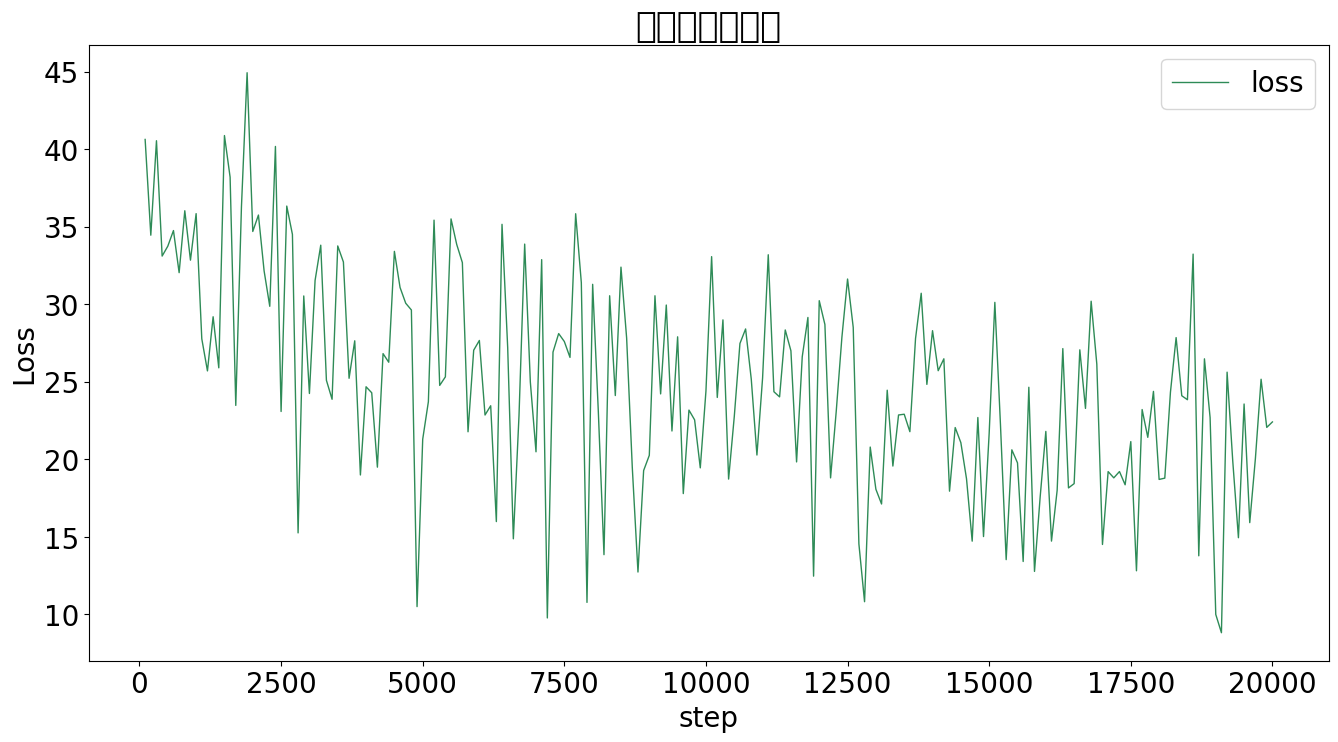

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [19]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_9831/217502035.py:17: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_9831/217502035.py:17: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_9831/217502035.py:17: UserWarning: Glyph 3

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/root/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/anaconda3/envs/dl/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from 

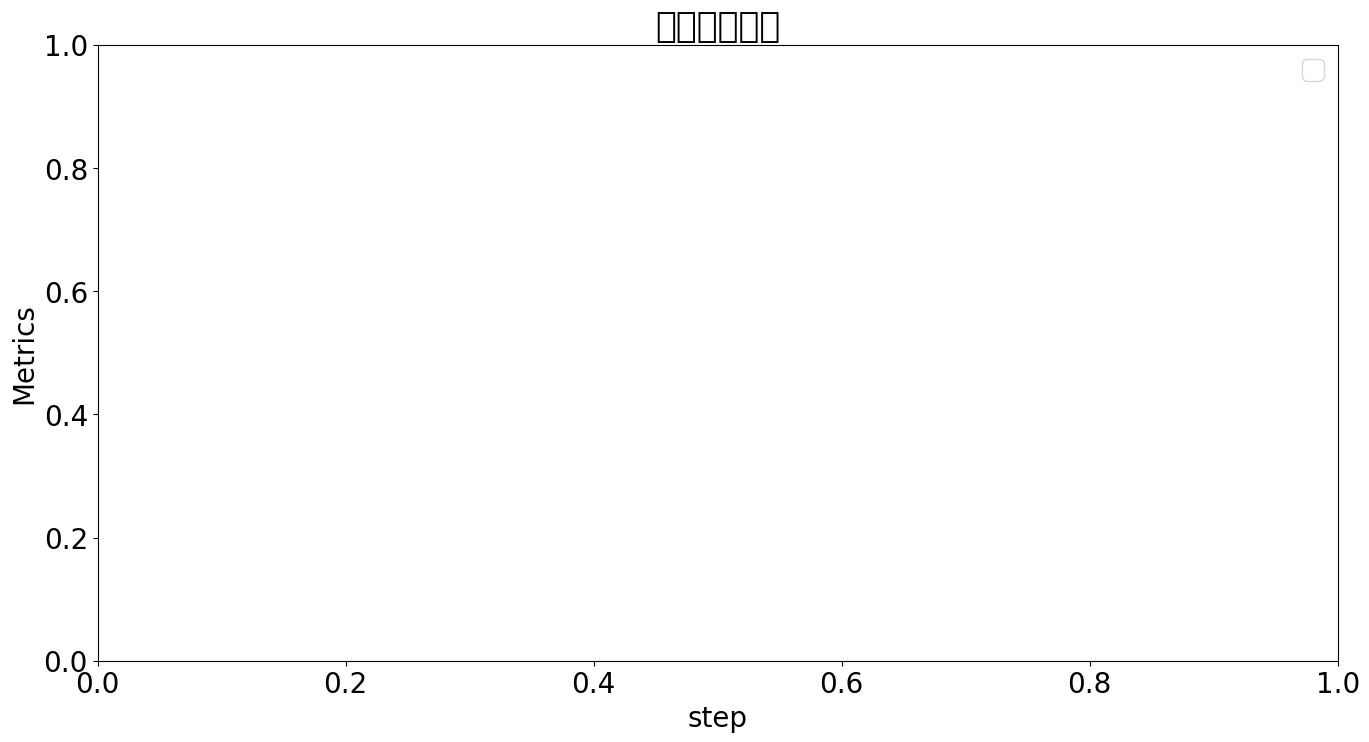

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [21]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [22]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
/tmp/ipykernel_9831/1268794451.py:18: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_9831/1268794451.py:18: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_9831/1268794451.py:18: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_9831

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

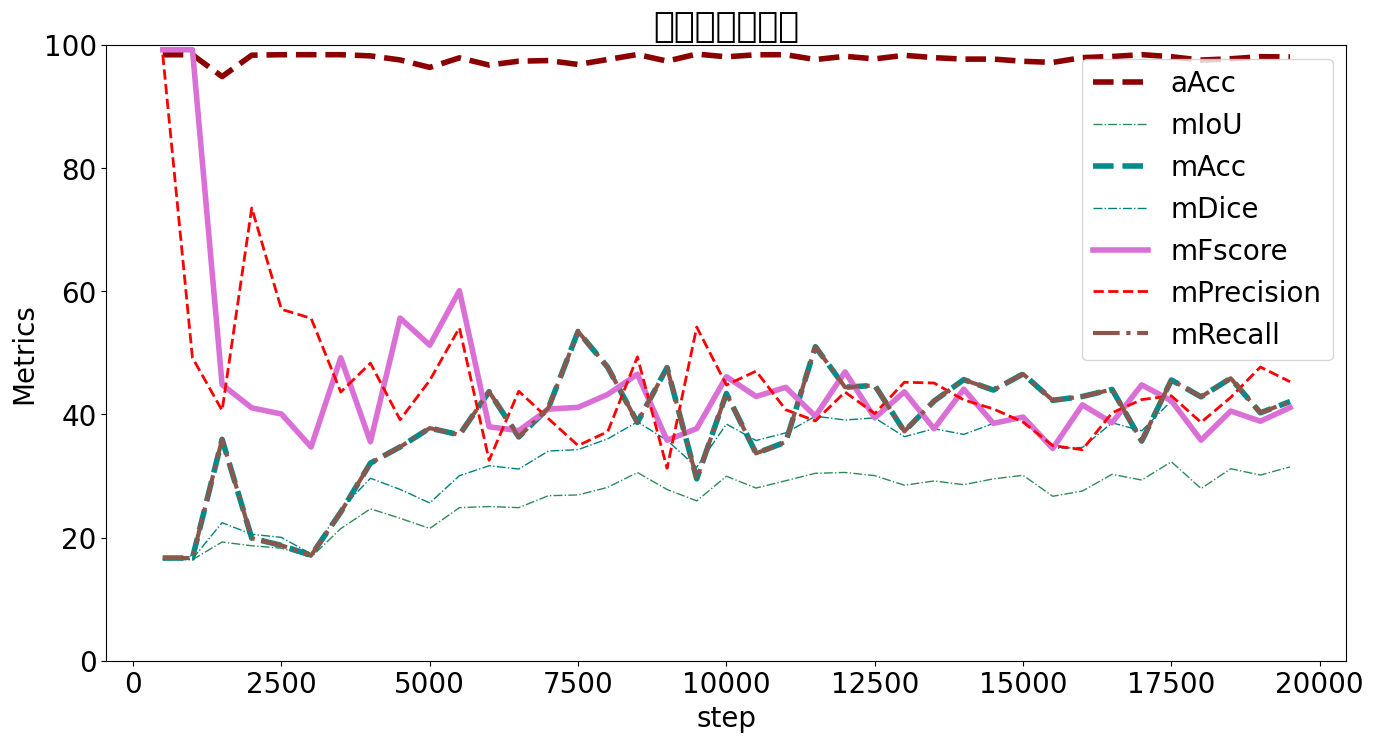

In [23]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()